# Credits basd on Keras Examples

# We first train a normal CNN for classification, and then we train a tranformer model

### Load the data

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import sys
print(sys.executable)

2022-03-06 19:32:01.072090: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


/home/nesl/anaconda3/envs/tf25/bin/python


In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

In [4]:
root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3601, 500) (3601,)
(1320, 500) (1320,)


In [6]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))
print(classes)

[-1  1]


# See the data"

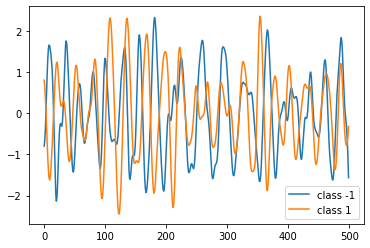

In [7]:
plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
    
plt.legend(loc="best")
plt.show()
plt.close()

# Keras Model Now: Conv1D

In [8]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [9]:
num_classes = len(np.unique(y_train))

idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [10]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=32, kernel_size=5)(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=16, kernel_size=3)(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=16, kernel_size=3)(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    
    dp = keras.layers.Dropout(0.2)(conv3)
    flat = keras.layers.Flatten()(dp)
    dense = keras.layers.Dense(16, activation='relu')(flat)
    output_layer = keras.layers.Dense(num_classes, activation="softmax")(dense)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

2022-03-06 19:32:07.107255: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-06 19:32:07.108331: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-06 19:32:07.195121: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.683GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-03-06 19:32:07.196020: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.683GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-03-06 19:32:07.196041: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 32)           192       
_________________________________________________________________
batch_normalization (BatchNo (None, 496, 32)           128       
_________________________________________________________________
re_lu (ReLU)                 (None, 496, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 16)           1552      
_________________________________________________________________
batch_normalization_1 (Batch (None, 494, 16)           64        
_________________________________________________________________
re_lu_1 (ReLU)               (None, 494, 16)           0     

In [12]:
epochs = 100
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]


In [13]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

In [14]:
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

2022-03-06 19:32:12.269064: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-06 19:32:12.288199: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3497870000 Hz


Epoch 1/100


2022-03-06 19:32:13.048754: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-03-06 19:32:13.244627: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-03-06 19:32:13.250143: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2022-03-06 19:32:14.024777: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-03-06 19:32:14.096341: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


90/90 [==============================] - 9s 31ms/step - loss: 0.7485 - sparse_categorical_accuracy: 0.5086 - val_loss: 0.6937 - val_sparse_categorical_accuracy: 0.4813
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 0.5542 - sparse_categorical_accuracy: 0.7006 - val_loss: 0.6996 - val_sparse_categorical_accuracy: 0.4813
Epoch 3/100
90/90 [==============================] - 1s 7ms/step - loss: 0.5121 - sparse_categorical_accuracy: 0.7377 - val_loss: 0.7090 - val_sparse_categorical_accuracy: 0.4813
Epoch 4/100
90/90 [==============================] - 1s 6ms/step - loss: 0.5103 - sparse_categorical_accuracy: 0.7266 - val_loss: 0.7193 - val_sparse_categorical_accuracy: 0.4813
Epoch 5/100
90/90 [==============================] - 1s 6ms/step - loss: 0.5053 - sparse_categorical_accuracy: 0.7513 - val_loss: 0.5169 - val_sparse_categorical_accuracy: 0.7490
Epoch 6/100
90/90 [==============================] - 1s 6ms/step - loss: 0.4955 - sparse_categorical_accuracy: 0.751

90/90 [==============================] - 1s 6ms/step - loss: 0.1023 - sparse_categorical_accuracy: 0.9661 - val_loss: 0.4621 - val_sparse_categorical_accuracy: 0.8669
Epoch 47/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0896 - sparse_categorical_accuracy: 0.9727 - val_loss: 0.4652 - val_sparse_categorical_accuracy: 0.8225
Epoch 48/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0731 - sparse_categorical_accuracy: 0.9791 - val_loss: 0.3729 - val_sparse_categorical_accuracy: 0.8682
Epoch 49/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0635 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.4977 - val_sparse_categorical_accuracy: 0.8377
Epoch 50/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0927 - sparse_categorical_accuracy: 0.9730 - val_loss: 0.5326 - val_sparse_categorical_accuracy: 0.8419
Epoch 51/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0711 - sparse_categorical_accuracy: 0

In [15]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

Test accuracy 0.8371211886405945
Test loss 0.4036809206008911


# Learning curve of model

In [16]:
# metric = "sparse_categorical_accuracy"
# plt.figure()
# plt.plot(history.history[metric])
# plt.plot(history.history["val_" + metric])
# plt.title("model " + metric)
# plt.ylabel(metric, fontsize="large")
# plt.xlabel("epoch", fontsize="large")
# plt.legend(["train", "val"], loc="best")
# plt.show()
# plt.close()

# Tranformer model

In [17]:
x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

n_classes = len(np.unique(y_train))

idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

print(x_train.shape, y_train.shape)

(3601, 500, 1) (3601,)


In [18]:
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs
    
    
    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [25]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0):

    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [30]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=32,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=2,
    mlp_units=[32],
    mlp_dropout=0.0,
    dropout=0.0,
)

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 500, 1)]     0                                            
__________________________________________________________________________________________________
layer_normalization_4 (LayerNor (None, 500, 1)       2           input_4[0][0]                    
__________________________________________________________________________________________________
multi_head_attention_2 (MultiHe (None, 500, 1)       897         layer_normalization_4[0][0]      
                                                                 layer_normalization_4[0][0]      
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 500, 1)       0           multi_head_attention_2[0][0

In [31]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)

In [32]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
)

Epoch 1/50
45/45 [==============================] - 5s 85ms/step - loss: 0.9979 - sparse_categorical_accuracy: 0.4957 - val_loss: 0.8435 - val_sparse_categorical_accuracy: 0.5381
Epoch 2/50
45/45 [==============================] - 3s 76ms/step - loss: 0.7850 - sparse_categorical_accuracy: 0.5623 - val_loss: 0.7672 - val_sparse_categorical_accuracy: 0.5520
Epoch 3/50
45/45 [==============================] - 3s 76ms/step - loss: 0.7097 - sparse_categorical_accuracy: 0.5994 - val_loss: 0.7195 - val_sparse_categorical_accuracy: 0.5784
Epoch 4/50
45/45 [==============================] - 3s 76ms/step - loss: 0.6834 - sparse_categorical_accuracy: 0.6113 - val_loss: 0.6862 - val_sparse_categorical_accuracy: 0.6061
Epoch 5/50
45/45 [==============================] - 3s 76ms/step - loss: 0.6228 - sparse_categorical_accuracy: 0.6598 - val_loss: 0.6624 - val_sparse_categorical_accuracy: 0.6297
Epoch 6/50
45/45 [==============================] - 3s 77ms/step - loss: 0.6041 - sparse_categorical_accu

45/45 [==============================] - 3s 76ms/step - loss: 0.3025 - sparse_categorical_accuracy: 0.8923 - val_loss: 0.5030 - val_sparse_categorical_accuracy: 0.7490
Epoch 47/50
45/45 [==============================] - 3s 76ms/step - loss: 0.3043 - sparse_categorical_accuracy: 0.8961 - val_loss: 0.5017 - val_sparse_categorical_accuracy: 0.7476
Epoch 48/50
45/45 [==============================] - 3s 76ms/step - loss: 0.2914 - sparse_categorical_accuracy: 0.8952 - val_loss: 0.5011 - val_sparse_categorical_accuracy: 0.7545
Epoch 49/50
45/45 [==============================] - 3s 77ms/step - loss: 0.2968 - sparse_categorical_accuracy: 0.8949 - val_loss: 0.5010 - val_sparse_categorical_accuracy: 0.7531
Epoch 50/50
45/45 [==============================] - 3s 77ms/step - loss: 0.2973 - sparse_categorical_accuracy: 0.8906 - val_loss: 0.4978 - val_sparse_categorical_accuracy: 0.7517


In [33]:
model.evaluate(x_test, y_test, verbose=1)

42/42 [==============================] - 1s 13ms/step - loss: 0.5010 - sparse_categorical_accuracy: 0.7735


[0.5010031461715698, 0.7734848260879517]